<a href="https://colab.research.google.com/github/Rajeswar1i/SMS-SPAM-DETECTION/blob/main/Copy_of_Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import wordcloud
import nltk
import warnings
import re
warnings.filterwarnings('ignore')

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"

In [ ]:
df= pd.read_csv("/content/spam.csv", encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Data Cleaning

In [ ]:
df.drop(df.columns[-3:],axis = 1, inplace = True)
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.isna().sum()

,0
label,0
text,0


In [ ]:
df['label'].value_counts()


,count
label,
ham,4825
spam,747


Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import re
import nltk
from nltk.util import ngrams
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

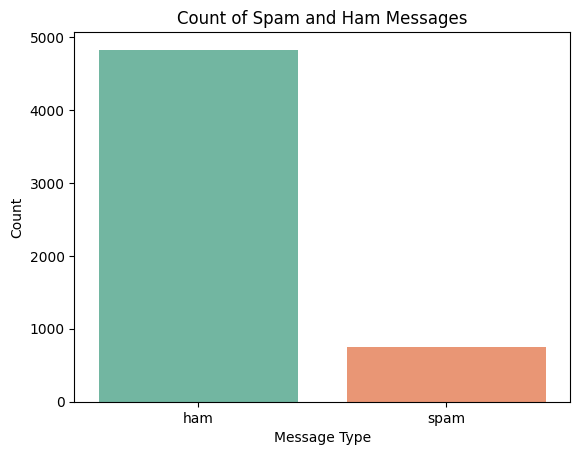

In [ ]:
sns.countplot(data=df, x='label',hue = 'label', palette='Set2')
plt.title("Count of Spam and Ham Messages")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

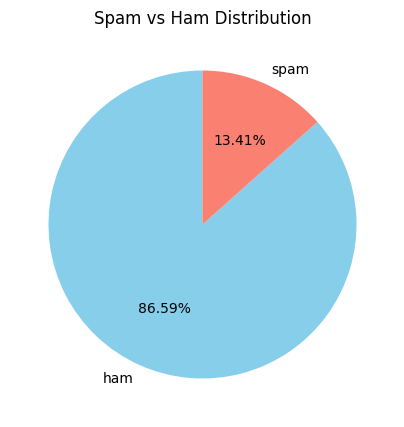

In [ ]:
plt.figure(figsize=(5,5))
counts = df['label'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title("Spam vs Ham Distribution")

plt.show()

In [ ]:
df['char_count'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['avg_word_length'] = df['char_count'] / df['word_count']

In [ ]:
df.head()

,label,text,char_count,word_count,avg_word_length
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,5.550000
1,ham,Ok lar... Joking wif u oni...,29,6,4.833333
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,5.535714
3,ham,U dun say so early hor... U c already then say...,49,11,4.454545
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,4.692308


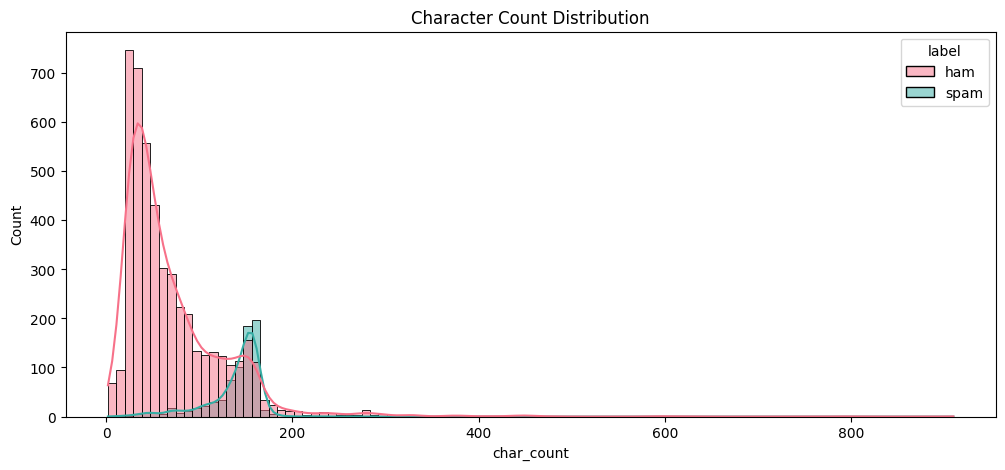

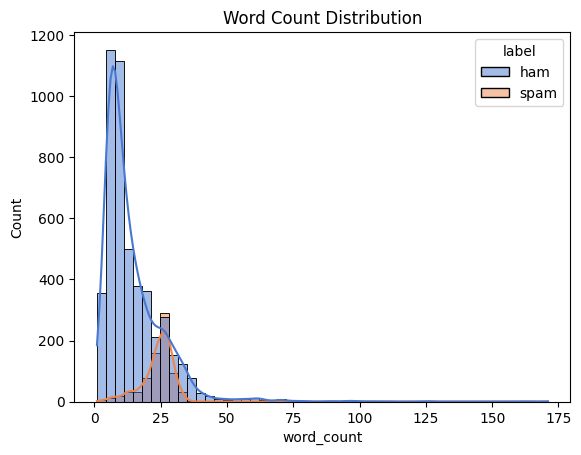

In [ ]:
plt.figure(figsize=(12, 5))

sns.histplot(data=df, x='char_count', hue='label', bins=100, kde=True, palette='husl')
plt.title("Character Count Distribution")
plt.show()

sns.histplot(data=df, x='word_count', hue='label', bins=50, kde=True, palette='muted')
plt.title("Word Count Distribution")
plt.show()

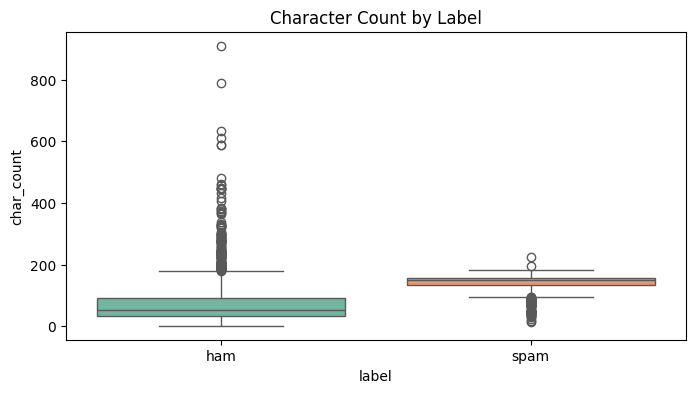

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='label', y='char_count',hue = 'label', palette='Set2')
plt.title("Character Count by Label")
plt.show()

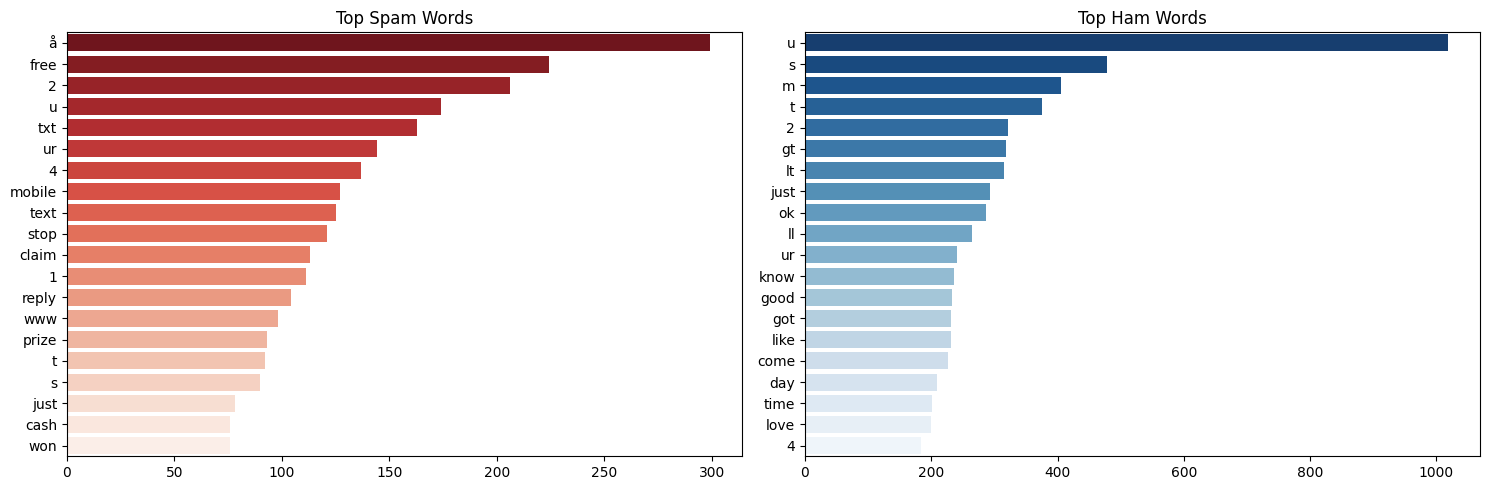

In [ ]:
def get_common_words(label, n=20):
    words = ' '.join(df[df['label']==label]['text']).lower()
    words = re.findall(r'\b\w+\b', words)
    words = [w for w in words if w not in ENGLISH_STOP_WORDS]
    return Counter(words).most_common(n)

spam_words = get_common_words('spam')
ham_words = get_common_words('ham')

# Plot
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Spam
sns.barplot(x=[x[1] for x in spam_words], y=[x[0] for x in spam_words], ax=axs[0],palette='Reds_r')
axs[0].set_title('Top Spam Words')

# Ham
sns.barplot(x=[x[1] for x in ham_words], y=[x[0] for x in ham_words], ax=axs[1], palette='Blues_r')
axs[1].set_title('Top Ham Words')
plt.tight_layout()
plt.show()

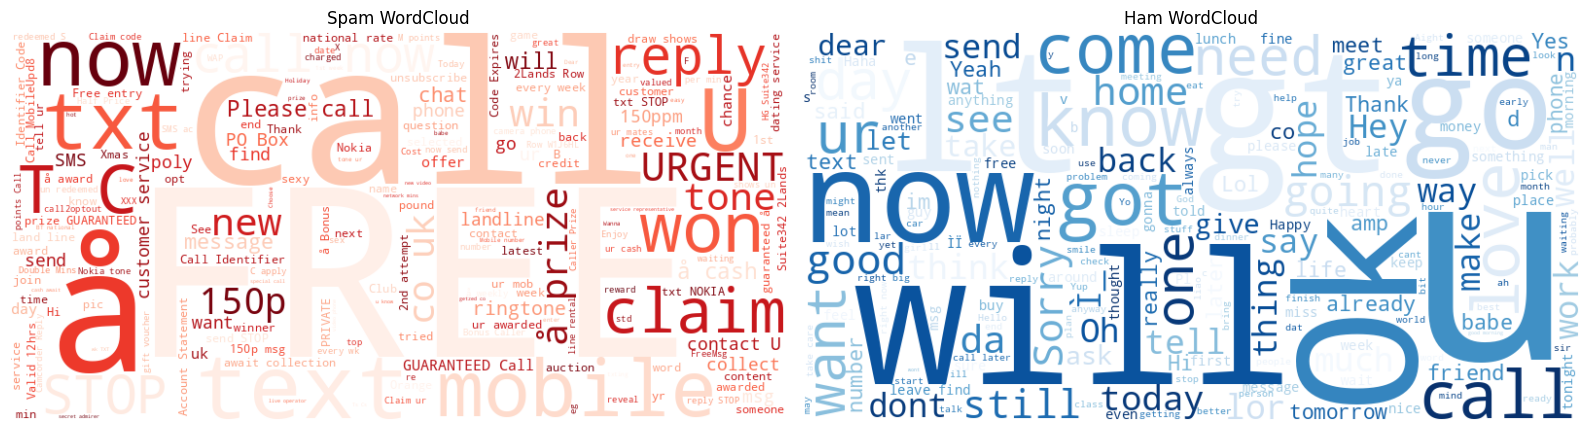

In [ ]:
spam_text = ' '.join(df[df['label']=='spam']['text'])
ham_text = ' '.join(df[df['label']=='ham']['text'])

plt.figure(figsize=(16,6))

# Spam WordCloud
wc_spam = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_text)
plt.subplot(1,2,1)
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis('off')
plt.title("Spam WordCloud")

# Ham WordCloud
wc_ham = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_text)
plt.subplot(1,2,2)
plt.imshow(wc_ham, interpolation='bilinear')
plt.axis('off')
plt.title("Ham WordCloud")

plt.tight_layout()
plt.show()

In [ ]:
def get_top_ngrams(texts, ngram_range=(2,2), n=20):
    tokens = []
    for txt in texts:
        txt = re.sub(r'[^\w\s]', '', txt.lower())
        tokens += list(ngrams(txt.split(), ngram_range[0]))
    return Counter(tokens).most_common(n)

spam_bigrams = get_top_ngrams(df[df['label']=='spam']['text'], ngram_range=(2,2))
print("Top Spam Bigrams:")
for ng, count in spam_bigrams:
    print(' '.join(ng), ":", count)

Top Spam Bigrams:
you have : 73
have won : 54
your mobile : 49
to claim : 46
please call : 44
won a : 40
this is : 40
to contact : 37
you are : 35
stop to : 28
cash or : 27
u have : 27
will be : 25
or a : 25
a å2000 : 25
contact u : 24
po box : 24
to receive : 23
å1000 cash : 23
guaranteed call : 23


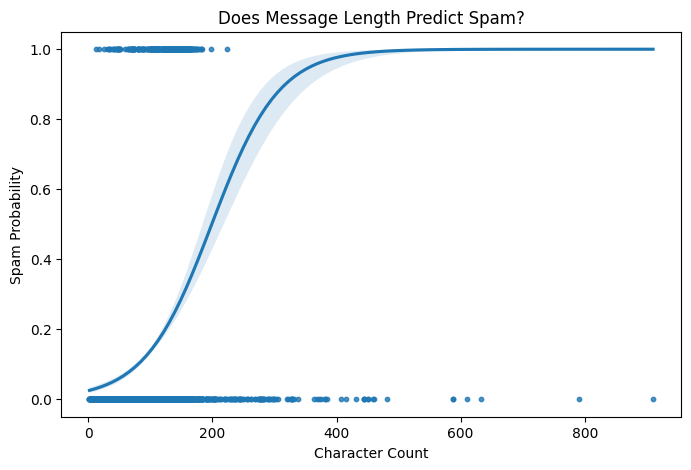

In [ ]:
df['is_spam'] = df['label'].map({'ham': 0, 'spam': 1})

plt.figure(figsize=(8,5))
sns.regplot(data=df, x='char_count', y='is_spam', logistic=True, scatter_kws={'s':10})
plt.title("Does Message Length Predict Spam?")
plt.ylabel("Spam Probability")
plt.xlabel("Character Count")
plt.show()

In [ ]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return " ".join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])

df['clean_text'] = df['text'].apply(preprocess)

In [ ]:
df.head()

,label,text,char_count,word_count,avg_word_length,is_spam,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,5.550000,0,jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,29,6,4.833333,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,5.535714,1,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,11,4.454545,0,u dun say early hor u c say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,4.692308,0,nah dont think goes usf lives


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])

In [ ]:
X.shape

(5572, 9174)

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(df['label'])  # ham = 0, spam = 1

In [ ]:
print(y)

[0 0 1 ... 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
model.fit(X_train, y_train)


SGDClassifier(loss='log_loss', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9614349775784753
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.97      0.73      0.84       150

    accuracy                           0.96      1115
   macro avg       0.97      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



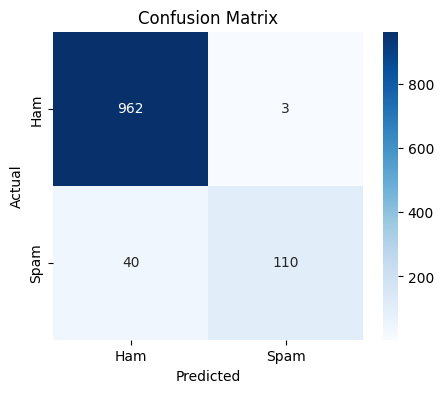

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()